<a href="https://colab.research.google.com/github/IsraaFahmy/Statistics-and-Data-Science-Micromasters-/blob/main/MITxT%2014.310xDASS/Notebooks/social_w5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Bias, Variance, and Optimal Estimators

DATASET:https://www.kaggle.com/datasets/mirichoi0218/insurance


In [ ]:
# install.packages('caret')

In [ ]:
library(tidyverse)
library(caret)

In [ ]:
#health insurance charges -- load data
health <- read_csv('health_insurance_charges.csv')
head(health)

New names:
• `` -> `...1`
Rows: 1207 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): sex, smoker, region
dbl (5): ...1, age, bmi, children, charges

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,age,sex,bmi,children,smoker,region,charges
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,18,male,33.770,1,no,southeast,1725.552
2,28,NA,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.471
5,31,female,NA,0,no,southeast,3756.622
6,46,female,33.440,1,no,southeast,8240.590
7,37,female,27.740,3,no,northwest,7281.506


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 112 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 112 rows containing missing values (`geom_point()`).”


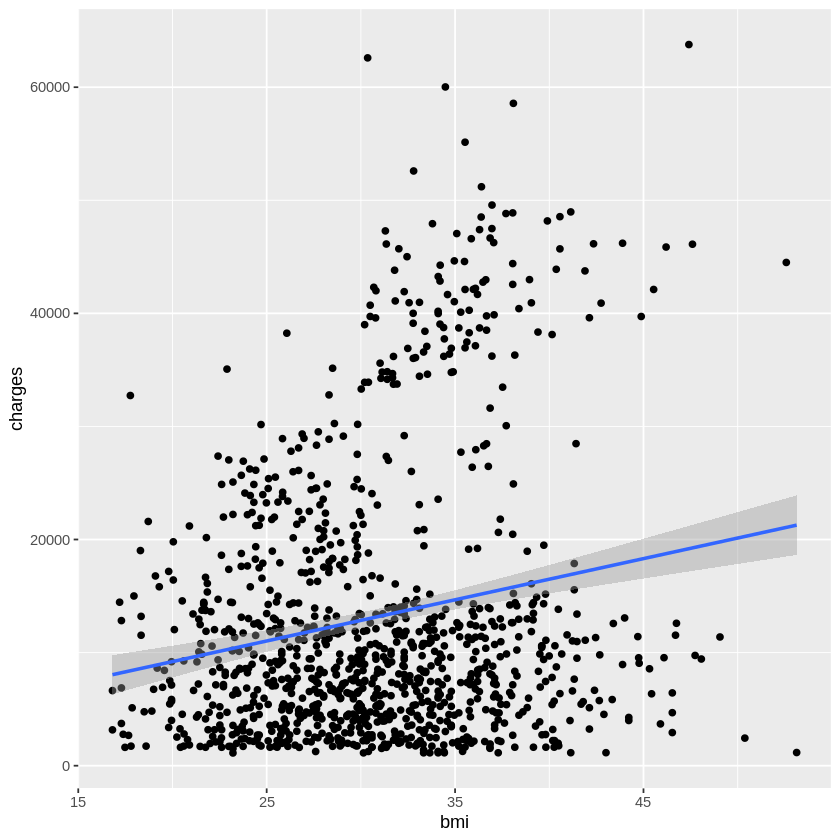

In [ ]:
ggplot(health, aes(x = bmi, y = charges)) +
  geom_point() +
  geom_smooth(method = 'lm')

In [ ]:
#simple model
model1 <- lm(charges ~ 0 + bmi, data = health)

In [ ]:
#is it biased?
summary(model1)


Call:
lm(formula = charges ~ 0 + bmi, data = health)

Residuals:
   Min     1Q Median     3Q    Max 
-21381  -7963  -3604   4730  49710 

Coefficients:
    Estimate Std. Error t value Pr(>|t|)    
bmi   424.33      11.36   37.36   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11790 on 1094 degrees of freedom
  (112 observations deleted due to missingness)
Multiple R-squared:  0.5605,	Adjusted R-squared:  0.5601 
F-statistic:  1395 on 1 and 1094 DF,  p-value: < 2.2e-16


In [ ]:
head(health)

...1,age,sex,bmi,children,smoker,region,charges
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,18,male,33.770,1,no,southeast,1725.552
2,28,NA,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.471
5,31,female,NA,0,no,southeast,3756.622
6,46,female,33.440,1,no,southeast,8240.590
7,37,female,27.740,3,no,northwest,7281.506


In [ ]:
?data.frame

In [ ]:
new_data <- data.frame(bmi = c(33.77, 33))

In [ ]:
?predict

In [ ]:
preds <- predict(model1, new_data)

In [ ]:
true <- c(1725.552, 4449.462)

In [ ]:
mean((preds - true)^2)

[1] 125063281

In [ ]:
all_preds <- predict(model1, data.frame(bmi = health$bmi))

In [ ]:
health <- drop_na(health)

In [ ]:
#quadratic terms
quad_model <- lm(charges ~ poly(bmi, 2), data = health)

In [ ]:
#next model
summary(quad_model)


Call:
lm(formula = charges ~ poly(bmi, 2), data = health)

Residuals:
   Min     1Q Median     3Q    Max 
-18073  -8064  -3965   4746  45630 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    13127.4      454.6  28.876  < 2e-16 ***
poly(bmi, 2)1  57471.6    11828.9   4.859 1.47e-06 ***
poly(bmi, 2)2   1493.5    11828.9   0.126      0.9    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11830 on 674 degrees of freedom
Multiple R-squared:  0.03386,	Adjusted R-squared:  0.03099 
F-statistic: 11.81 on 2 and 674 DF,  p-value: 9.087e-06


In [ ]:
quad_preds <- predict(quad_model, data.frame(bmi = health$bmi))

In [ ]:
#is it biased?
quad_errors <- health$charges - quad_preds

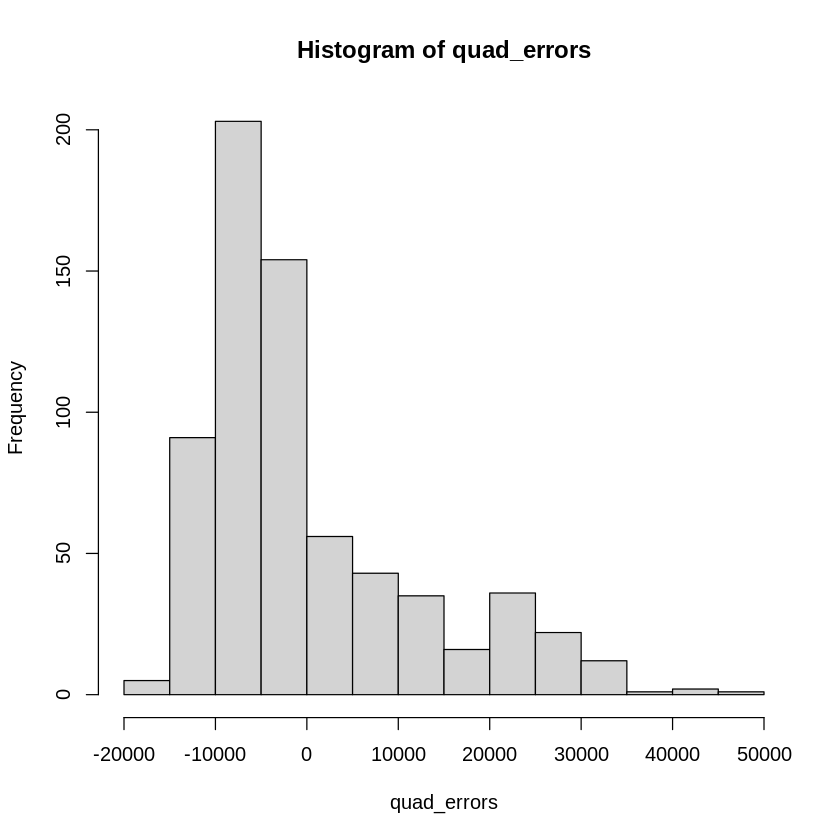

In [ ]:
hist(quad_errors)

In [ ]:
model1_preds <- predict(model1, data.frame(bmi = health$bmi))

In [ ]:
model1_errors <- health$charges - model1_preds

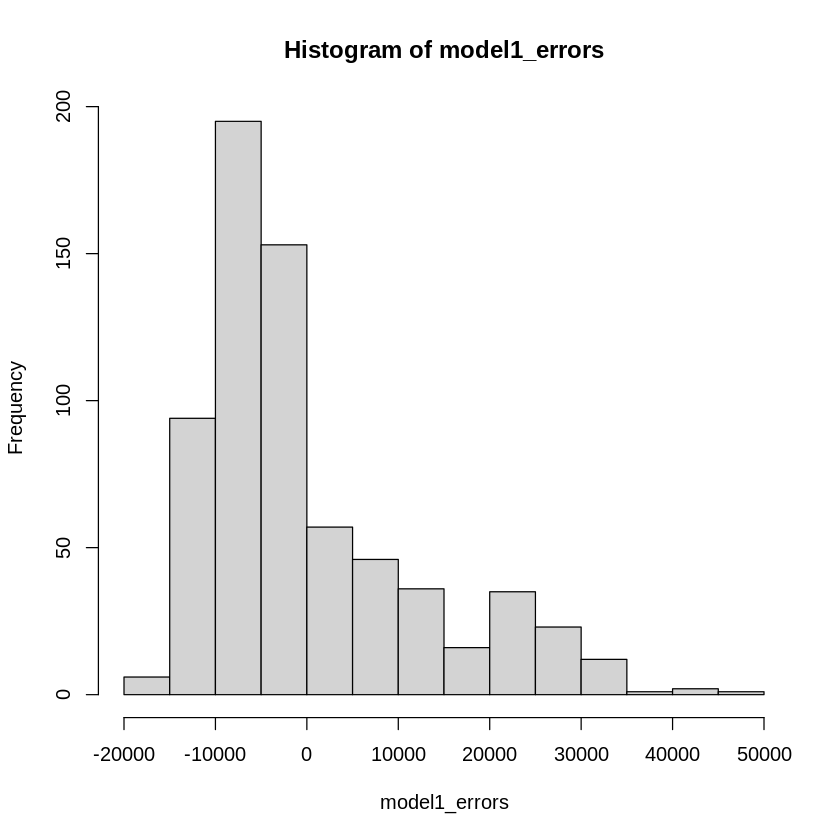

In [ ]:
hist(model1_errors)

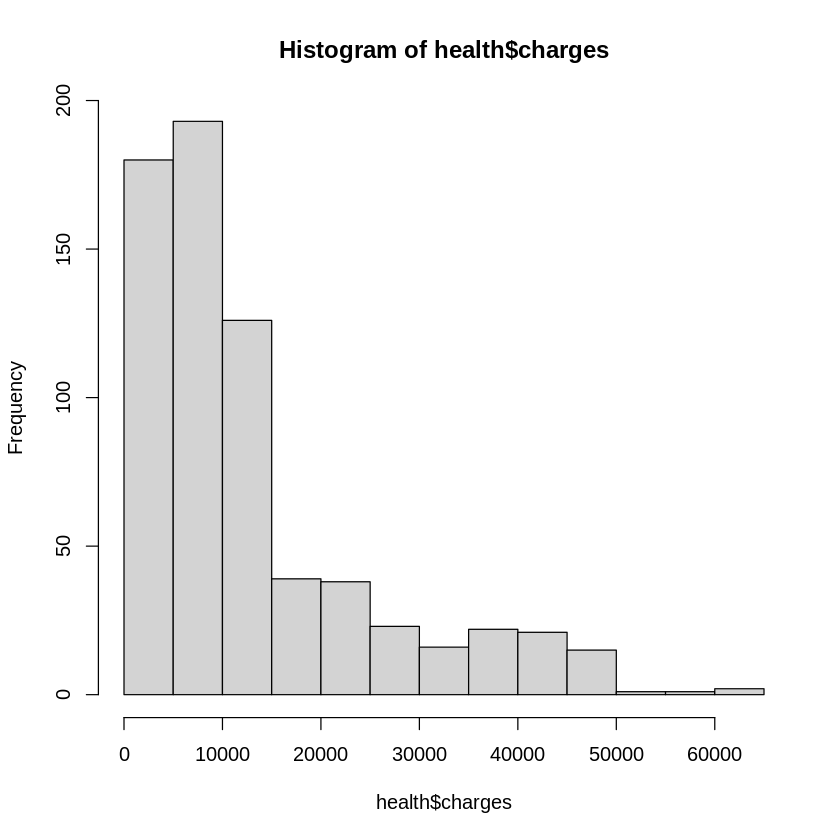

In [ ]:
hist(health$charges)

In [ ]:
scaled_charges <- (health$charges - mean(health$charges) )/ sd(health$charges)

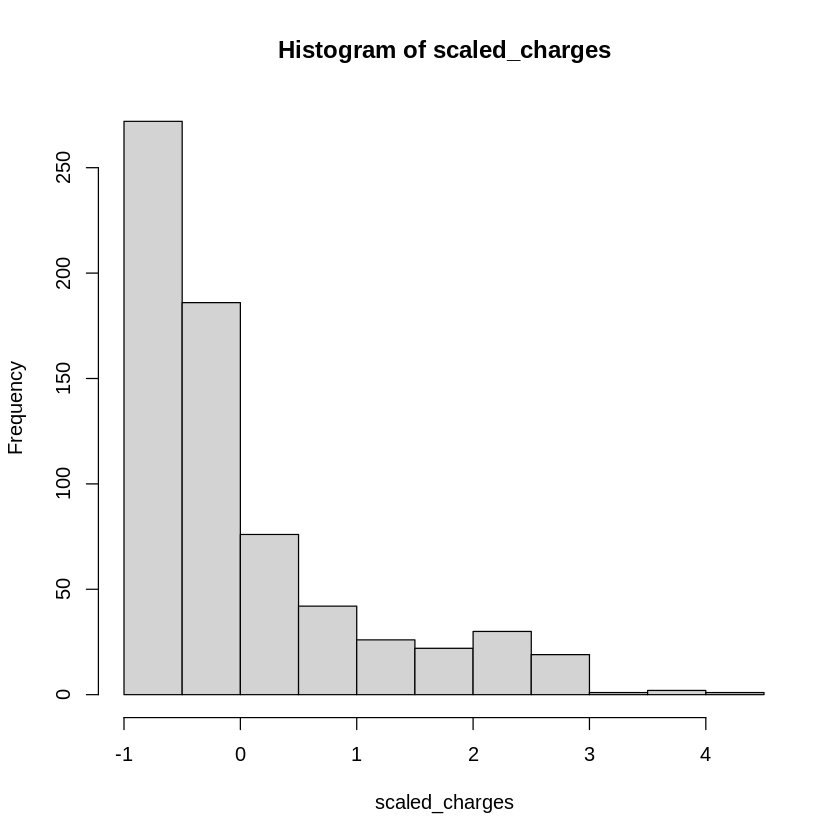

In [ ]:
hist(scaled_charges)

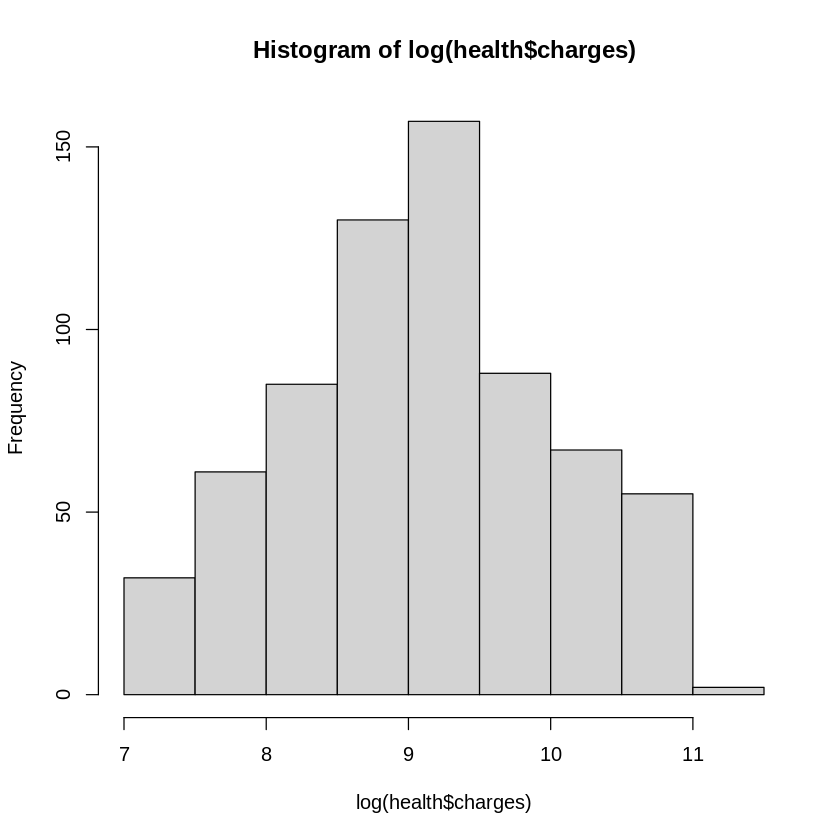

In [ ]:
hist(log(health$charges))

In [ ]:
install.packages('Metrics')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(Metrics)

In [ ]:
# rmse( )

In [ ]:
log_model1 <- lm(log(charges) ~ bmi, data = health)

In [ ]:
summary(log_model1)


Call:
lm(formula = log(charges) ~ bmi, data = health)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.22788 -0.61500  0.02136  0.65222  1.85656 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.624181   0.179070   48.16   <2e-16 ***
bmi         0.015129   0.005688    2.66    0.008 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9068 on 675 degrees of freedom
Multiple R-squared:  0.01037,	Adjusted R-squared:  0.008908 
F-statistic: 7.076 on 1 and 675 DF,  p-value: 0.008


In [ ]:
log_preds1 <- predict(log_model1, data.frame(bmi = health$bmi))

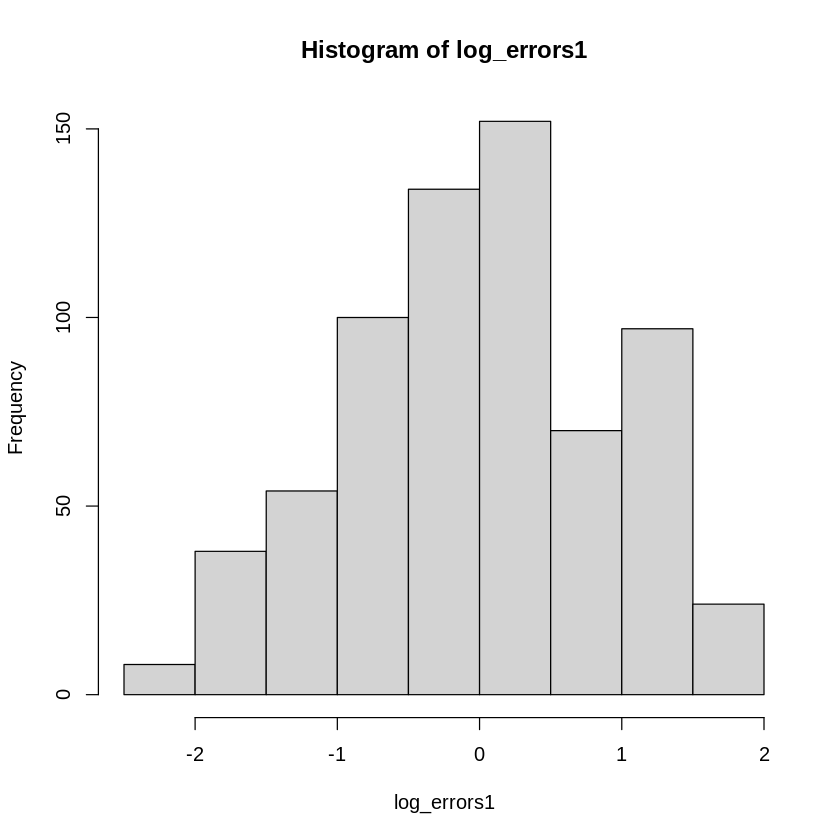

In [ ]:
log_errors1 <- log(health$charges) - log_preds1
hist(log_errors1)

In [ ]:
log_quadmodel <- lm(log(charges) ~ poly(bmi, 7), data = health)

In [ ]:
quad_preds <- predict(log_quadmodel, data.frame(bmi = health$bmi))

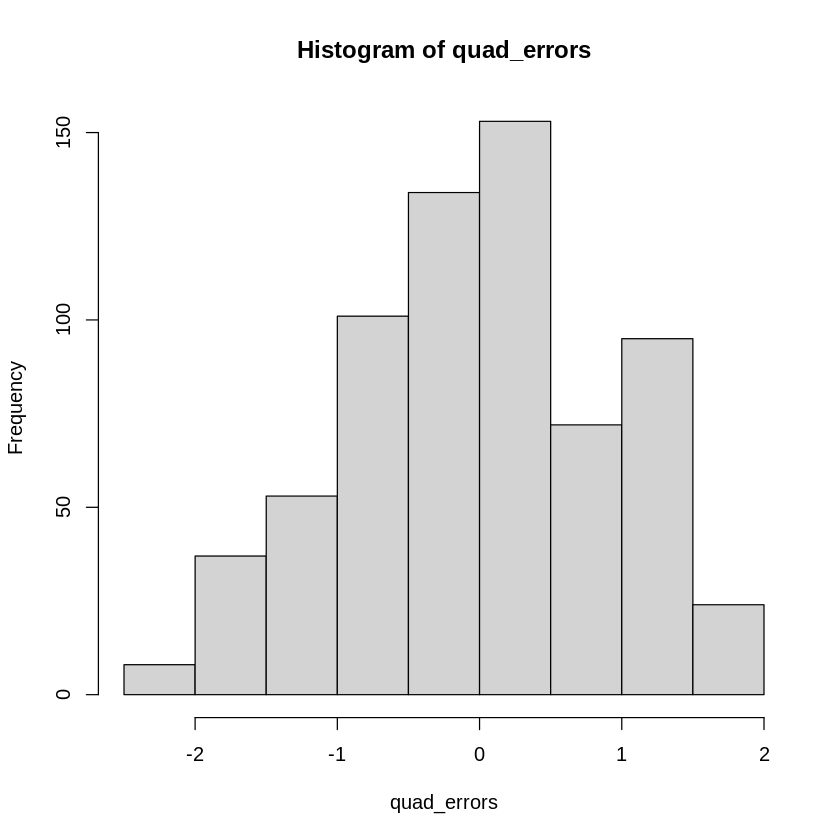

In [ ]:
quad_errors <- log(health$charges) - quad_preds
hist(quad_errors)

In [ ]:
#what about variance?


#### More Models

Build polynomial models of degree 1 - 9 on the data, computing the rmse of each model.

#### `caret`

In [ ]:
train_idx <- createDataPartition(health$charges, p = .8, list = FALSE)

In [ ]:
train_idx

Resample1
1
2
3
5
6
7
8
10
11
12


In [ ]:
train <- health[train_idx, ]
test <- health[-train_idx,]

In [ ]:
fitControl <- trainControl(method = "cv",
                            number = 5)

In [ ]:
ridge_model <- train(charges ~ .,
        data = train,
        method = 'ridge',
        trControl = fitControl)

In [ ]:
install.packages('elasticnet')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
ridge_model <- train(charges ~ .,
        data = train,
        method = 'ridge',
        trControl = fitControl)

In [ ]:
ridge_model

Ridge Regression 

544 samples
  7 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 435, 436, 435, 434, 436 
Resampling results across tuning parameters:

  lambda  RMSE      Rsquared   MAE     
  0e+00   6191.412  0.7420439  4288.813
  1e-04   6191.407  0.7420442  4288.813
  1e-01   6188.155  0.7422611  4290.237

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was lambda = 0.1.

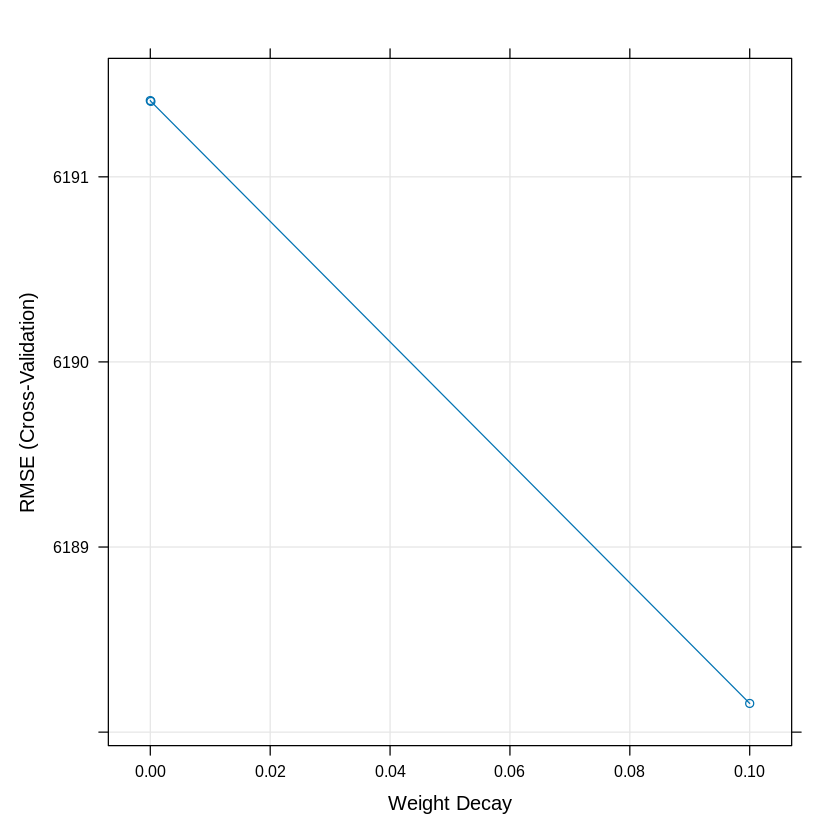

In [ ]:
plot(ridge_model)

In [ ]:
lasso_model <- train(charges ~ .,
        data = train,
        method = 'lasso',
        trControl = fitControl)

In [ ]:
lasso_model

The lasso 

544 samples
  7 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 434, 436, 436, 435, 435 
Resampling results across tuning parameters:

  fraction  RMSE       Rsquared   MAE     
  0.1       10769.039  0.6020488  7929.151
  0.5        7239.045  0.6937842  5246.145
  0.9        6150.859  0.7412935  4216.034

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was fraction = 0.9.

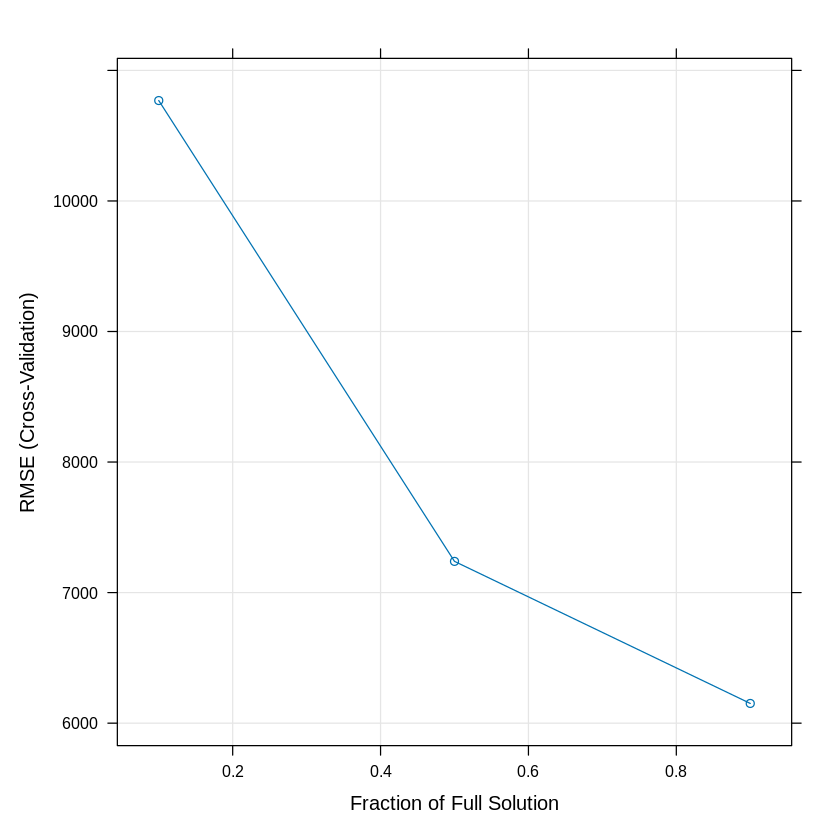

In [ ]:
plot(lasso_model)

In [ ]:
install.packages('rpart')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
bart_model <- train(charges ~ .,
        data = train,
        method = 'rpart',
        trControl = fitControl)

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


In [ ]:
bart_model

CART 

544 samples
  7 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 436, 435, 435, 434, 436 
Resampling results across tuning parameters:

  cp          RMSE       Rsquared   MAE     
  0.06491143   5577.679  0.7939468  3938.114
  0.11920197   6875.594  0.6956972  5046.506
  0.65183263  10556.510  0.6289379  7885.432

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.06491143.

In [ ]:
bpreds <- predict(bart_model, test)

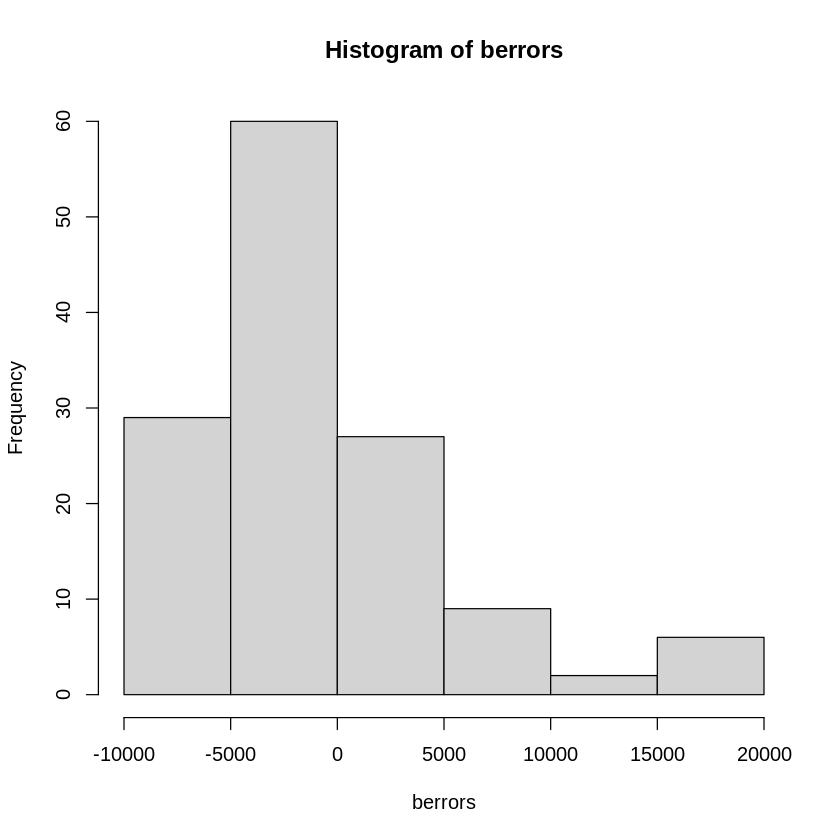

In [ ]:
berrors <- test$charges - bpreds
hist(berrors)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Formula’, ‘truncnorm’




Number of parameters (weights and biases) to estimate: 11 
Nguyen-Widrow method
Scaling factor= 0.7 
gamma= 10.8943 	 alpha= 2.8684 	 beta= 13.993 
Number of parameters (weights and biases) to estimate: 22 
Nguyen-Widrow method
Scaling factor= 0.7011189 
gamma= 20.9476 	 alpha= 1.4989 	 beta= 19.492 
Number of parameters (weights and biases) to estimate: 33 
Nguyen-Widrow method
Scaling factor= 0.7017742 
gamma= 29.1745 	 alpha= 2.0503 	 beta= 19.5062 
Number of parameters (weights and biases) to estimate: 11 
Nguyen-Widrow method
Scaling factor= 0.7 
gamma= 10.9093 	 alpha= 2.8578 	 beta= 15.0493 
Number of parameters (weights and biases) to estimate: 22 
Nguyen-Widrow method
Scaling factor= 0.7011163 
gamma= 20.9676 	 alpha= 1.6273 	 beta= 20.5145 
Number of parameters (weights and biases) to estimate: 33 
Nguyen-Widrow method
Scaling factor= 0.7017701 
gamma= 29.041 	 alpha= 2.3961 	 beta= 20.6212 
Number of parameters (weights and biases) to estimate: 11 
Nguyen-Widrow method
Scali

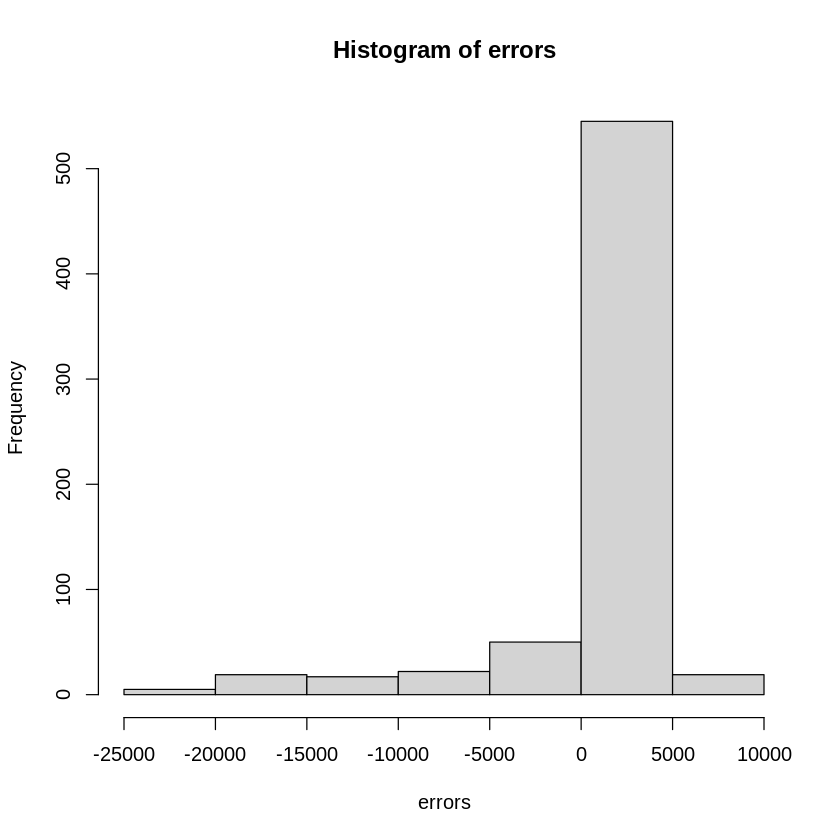

In [ ]:
install.packages("brnn")
brnn_model <- train(charges ~ .,
        data = train,
        method = 'brnn',
        trControl = fitControl)
charges_hat <- predict(brnn_model, data.frame(health))
errors <- charges_hat- health$charges
hist(errors)

In [ ]:
brnn_model

Bayesian Regularized Neural Networks 

544 samples
  7 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 434, 435, 436, 436, 435 
Resampling results across tuning parameters:

  neurons  RMSE      Rsquared   MAE     
  1        5863.715  0.7657860  4040.129
  2        4895.405  0.8351030  2922.597
  3        4927.043  0.8321956  2979.435

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was neurons = 2.

In [ ]:
rf_model <- train(charges ~ .,
      data = train,
      method = 'rf',
      trControl = fitControl
    )
rf_model

Random Forest 

544 samples
  7 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 435, 435, 435, 436, 435 
Resampling results across tuning parameters:

  mtry  RMSE      Rsquared   MAE     
  2     5756.325  0.8186053  4034.624
  5     4834.254  0.8395314  2808.085
  9     4926.169  0.8342665  2799.890

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 5.

In [ ]:
lars_model <- train(charges ~ ., data = train, method = 'lars', trControl = fitControl)
lars_model

Least Angle Regression 

544 samples
  7 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 436, 436, 434, 435, 435 
Resampling results across tuning parameters:

  fraction  RMSE       Rsquared   MAE     
  0.050     11417.224  0.6051658  8477.162
  0.525      7125.476  0.7051091  5124.730
  1.000      6163.407  0.7438169  4248.220

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was fraction = 1.

#### Problem

Building an optimal regression model for health care costs.

- consider additional features
- compare different models using cross validation
